### 심부전증 자료
- heart_failure_clinical_records_dataset.csv
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
- 각 파일의 컬럼은 아래와 같습니다.
   - age: 환자의 나이
   -  anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
   -  creatinine_phosphokinase: 크레아틴키나제 검사 결과
   -  diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
   -  ejection_fraction: 박출계수 (%)
   -  high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
   -  platelets: 혈소판 수 (kiloplatelets/mL)
   -  serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
   -  serum_sodium: 혈중 나트륨 레벨 (mEq/L)
   -  sex: 성별 (0: 여성, 1: 남성)
   -  smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
   -  time: 관찰 기간 (일)
   -  DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='age', ylabel='Count'>

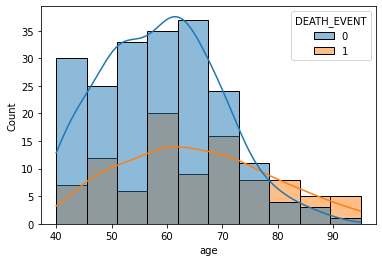

In [7]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

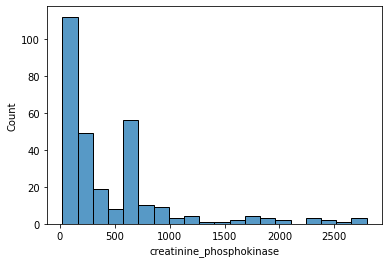

In [5]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000,
                         'creatinine_phosphokinase'])

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

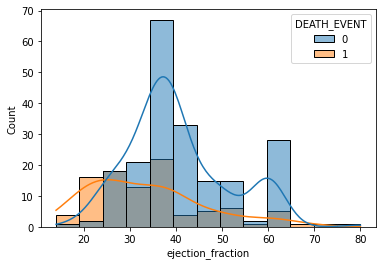

In [8]:
sns.histplot(x='ejection_fraction',
             data=df,
             bins=13,
             hue='DEATH_EVENT',
             kde=True)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

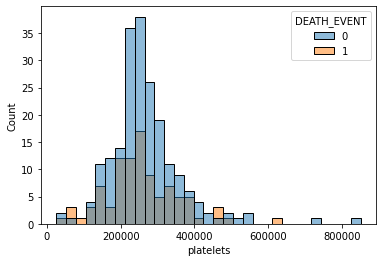

In [6]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

<AxesSubplot:xlabel='time', ylabel='Count'>

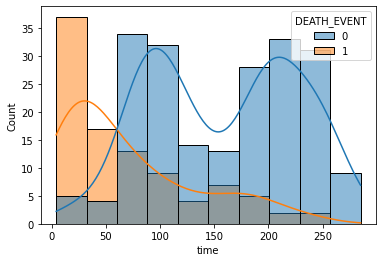

In [7]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

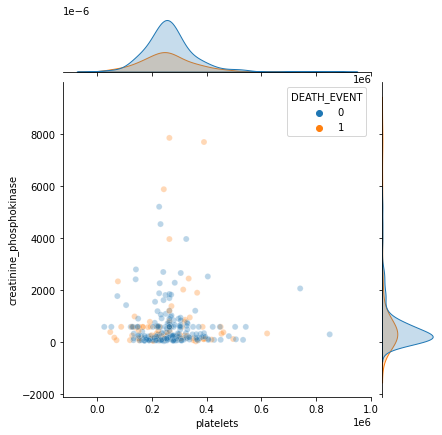

In [8]:
sns.jointplot(x='platelets',
              y='creatinine_phosphokinase',
              hue='DEATH_EVENT',
              data=df,
              alpha=0.3)

x변수간의 상관도가 높으면(다중공선성을 확인, VIF: 분산팽창지수로 확인, 10이상) 그 변수를 제거하는걸 권장

In [14]:
a = [1, 2, 3, 4]
b = [10, 20, 30, 40]
y
np.corrcoef(a, b)
df.corr

<bound method DataFrame.corr of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

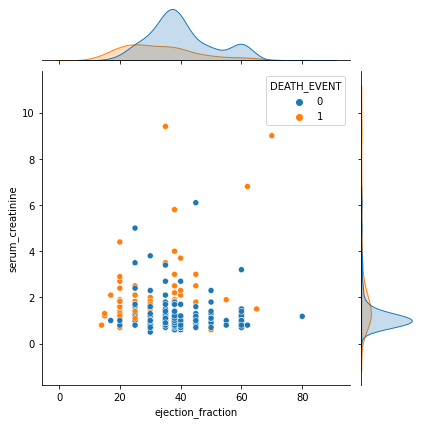

In [9]:
sns.jointplot(x='ejection_fraction',
              y='serum_creatinine',
              data=df,
              hue='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

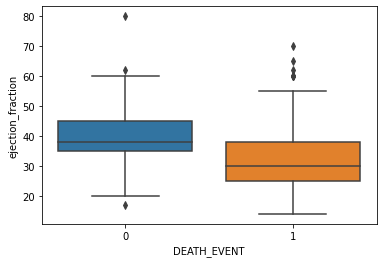

In [23]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

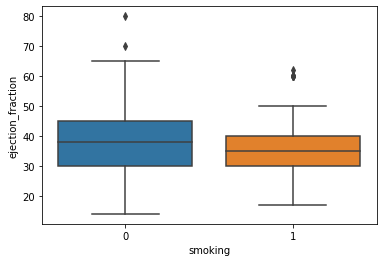

In [24]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

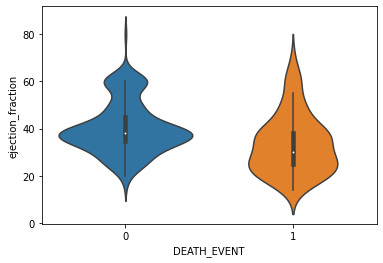

In [25]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

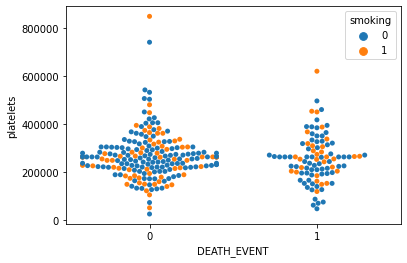

In [26]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

### 모델학습에 필요한 데이터 전처리

In [15]:
# creatinine_phosphokinase, ejection_fraction, high_blood_pressure는 변수명이 너무 길어서 각각 ck, ef, high_bp로 바꿈

df.rename(columns={
    'creatinine_phosphokinase': 'ck',
    'ejection_fraction': 'ef',
    'high_blood_pressure': 'high_bp'
},
          inplace=True)

In [146]:
# 연속형 데이터(scaler 필요)
X_num = df[[
    'age', 'ck', 'ef', 'platelets', 'serum_creatinine', 'serum_sodium'
]]
# 범주형 데이터(scaler 불필요)
X_cat = df[['anaemia', 'diabetes', 'high_bp', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [147]:
X_num

,age,ck,ef,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


In [148]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scale = scaler.transform(X_num)

X_scale1 = pd.DataFrame(data=X_scale, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scale1, X_cat], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

X_train

,age,ck,ef,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_bp,sex,smoking
14,-0.996547,-0.518074,-0.684180,1.675963,-0.381379,0.312044,1,0,1,0,0
210,0.771889,-0.381804,-1.784473,1.286781,-0.381379,-0.141976,0,1,1,1,1
236,1.192945,-0.477812,1.008578,-0.157292,-0.284552,2.582144,0,0,1,1,0
44,-0.070223,0.006360,1.854958,-0.710340,-0.284552,1.220084,1,1,0,0,0
163,-0.912335,1.808842,-0.260991,-1.929096,-0.478205,1.220084,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
203,-0.070223,-0.539753,-1.107370,-0.525991,2.039276,-0.141976,0,0,1,1,1
255,-0.743913,-0.403483,-0.684180,0.723490,-0.381379,1.220084,1,1,1,1,1
72,2.035057,5.471619,-0.260991,-0.208500,-0.381379,-1.050016,0,0,0,1,1
235,1.361368,-0.488136,1.008578,1.460889,-0.284552,0.085034,1,0,1,1,0


In [149]:
X_scale1.describe()

,age,ck,ef,platelets,serum_creatinine,serum_sodium
count,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,0.000000,-3.267546e-17,7.723291e-17,1.425838e-16,-8.673849e-16
std,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-0.576918,-2.038387e+00,-2.440155e+00,-8.655094e-01,-5.363206e+00
25%,-8.281242e-01,-0.480393,-6.841802e-01,-5.208700e-01,-4.782047e-01,-5.959961e-01
50%,-7.022315e-02,-0.342574,-7.076750e-03,-1.390846e-02,-2.845524e-01,8.503384e-02
75%,7.718891e-01,0.000166,5.853888e-01,4.111199e-01,5.926150e-03,7.660638e-01
max,2.877170e+00,7.514640,3.547716e+00,6.008180e+00,7.752020e+00,2.582144e+00


In [150]:
X

,age,ck,ef,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_bp,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


In [151]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [152]:
#  solver에 데이터셋이 작을 때 성능이 좋은lilinear 사용
model_lr.fit(X_train, y_train)

LogisticRegression()

In [153]:
model_lr.coef_, model_lr.intercept_

(array([[ 0.60511608,  0.28857561, -0.72188693, -0.16617385,  0.68958042,
         -0.21886371,  0.44162482,  0.23333924,  0.1970812 , -0.41520082,
         -0.02339355]]),
 array([-1.03999668]))

In [154]:
from sklearn.metrics import accuracy_score

y_preds = model_lr.predict(X_test)
print(accuracy_score(y_test, y_preds))  #1.0 #정확도

0.7555555555555555


[[59  5]
 [17  9]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



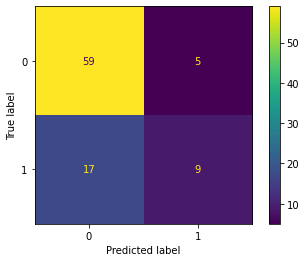

In [155]:
## 분류리포트 제작하여서 f1스코어 확인
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_preds)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lr.classes_)
disp.plot()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [156]:
proba = model_lr.predict_proba(X_test)

# proba[:, 0] # 모든 행의 0번째 열
# proba[:, 1] # 모든 행의 1번째 열

dic = {
    'y_test': y_test,
    'y_hat': y_preds,
    'y_0': proba[:, 0],
    'y_1': proba[:, 1]
}

df_ = pd.DataFrame(dic) 
df_['TF'] = df_['y_test'] == df_['y_hat']
FN = df_[(df_['y_test'] == 1) & (df_['y_hat'] == 0)]
FN

,y_test,y_hat,y_0,y_1,TF
51,1,0,0.554507,0.445493,False
27,1,0,0.769839,0.230161,False
11,1,0,0.732434,0.267566,False
110,1,0,0.844662,0.155338,False
12,1,0,0.769537,0.230463,False
16,1,0,0.574238,0.425762,False
58,1,0,0.726666,0.273334,False
185,1,0,0.633925,0.366075,False
39,1,0,0.563092,0.436908,False
181,1,0,0.593491,0.406509,False


In [157]:
FN['y_0'] = FN['y_0'] - 0.1
FN['y_1'] = FN['y_1'] + 0.1

reyhat = []
for x1, x2 in zip(df_['y_0'], df_['y_1']):
    if x1 > x2:
        reyhat.append(0)
    else:
        reyhat.append(1)
        
df_['reyhat'] = reyhat
y_test = df_['y_test']
new_yhat = df_['reyhat']

C:\Users\HP\AppData\Local\Temp\ipykernel_18884\2162186803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FN['y_0'] = FN['y_0'] - 0.1
C:\Users\HP\AppData\Local\Temp\ipykernel_18884\2162186803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FN['y_1'] = FN['y_1'] + 0.1


In [159]:
new_yhat, y_test

(173    0
 287    0
 51     0
 146    0
 214    0
       ..
 122    0
 246    0
 278    0
 251    0
 19     0
 Name: reyhat, Length: 90, dtype: int64,
 173    0
 287    0
 51     1
 146    0
 214    0
       ..
 122    0
 246    1
 278    0
 251    0
 19     1
 Name: y_test, Length: 90, dtype: int64)

### [임계값 조정]

- 지금의 데이터셋의 변수들을 바탕으로 로지스틱 모델을 만들 때 사망(DEATH_EVENT=1)으로의 예측을 좀 더 너그럽게 하면 로지스틱 모델의 성능이 조금 더 좋아질 수 있음

- 임계값을 디폴트인 0.5에서 0.45로 낮추면
- 정확도는 0.9로 유지한 상태에서 정밀도는 0.64에서 0.65, 재현율은 0.35에서 0.42, f1 스코어는 0.45에서 0.51로 개선할 수 있습니다.


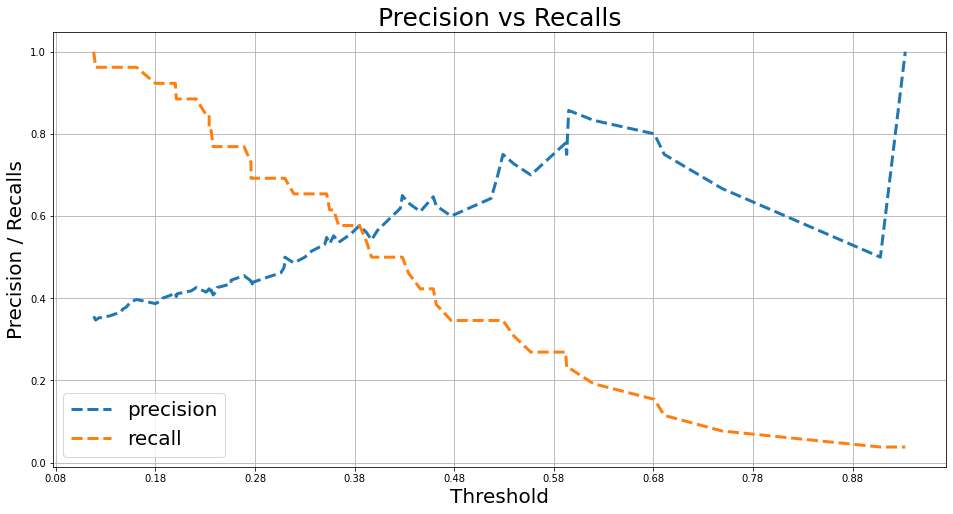

In [40]:
# 사망시 재현율값이 0.35로서 매우 낮기 때문에 임계값을 조정해서 재현율값을 좀 더 향샹시킬 수 있는지 알아보겠습니다.

from sklearn.metrics import precision_recall_curve

# 모델 modle_lr의 label값이 1일 예측 확률 array를 추출합니다.
pred_probs_1 = model_lr.predict_proba(X_test)[:, 1]

# 실제 y_test값과 label값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력합니다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_probs_1)

# print(thresholds.shape)  # (73,)
# 반환된 임계값 array가 총 73개이므로 10건만 추출하기 위해서 4 step단위로 추출합니다.
thr_index = np.arange(0, thresholds.shape[0])
# print(thr_index)    # # [ 0  7 14 21 28 35 42 49 56 63 70]

# 7 step단위로 추출된 임계값에 따른 임계값 정밀도와 재현율값
thresholds = np.round(thresholds[thr_index], 3)
precisions = np.round(precisions[thr_index], 3)
recalls = np.round(recalls[thr_index], 3)

plt.figure(figsize=(16, 8))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds,
         precisions[0:threshold_boundary],
         linestyle='--',
         linewidth=3,
         label='precision')
plt.plot(thresholds,
         recalls[0:threshold_boundary],
         linestyle='--',
         linewidth=3,
         label='recall')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlabel('Threshold', fontsize=20)
plt.ylabel('Precision / Recalls', fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.title('Precision vs Recalls', fontsize=25)
plt.grid()
plt.show()

In [41]:
# threshold값 변화에 따른 classification report를 출력합니다.
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값
thr_list = [0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55]

for thr in thr_list:
    pred_probs_1 = model_lr.predict_proba(X_test)[:, 1].reshape(-1, 1)
    binarizer = Binarizer(threshold=thr)
    binarizer.fit(pred_probs_1)
    pred = binarizer.transform(pred_probs_1)

    print('-------------------------- 임계값 : ' + str(thr) +
          ' -------------------------------')
    print(classification_report(y_test, pred))

-------------------------- 임계값 : 0.4 -------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        64
           1       0.57      0.50      0.53        26

    accuracy                           0.74        90
   macro avg       0.69      0.67      0.68        90
weighted avg       0.74      0.74      0.74        90

-------------------------- 임계값 : 0.425 -------------------------------
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90

-------------------------- 임계값 : 0.45 -------------------------------
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        64
           1       0.65    

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


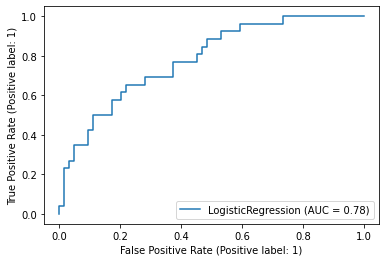

In [47]:
from sklearn.metrics import plot_roc_curve
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)

In [45]:
# model_lr.predict_proba(X_test)[:, 1].reshape(-1,1)

model_lr.predict_proba(X_test)[:, 1].reshape(-1, 1)

array([[0.27618886],
       [0.04581531],
       [0.45939205],
       [0.13436621],
       [0.29074131],
       [0.31887678],
       [0.35460578],
       [0.12291123],
       [0.22147555],
       [0.0244805 ],
       [0.30554931],
       [0.69108997],
       [0.26929881],
       [0.24239155],
       [0.16114081],
       [0.25566025],
       [0.14717233],
       [0.52940217],
       [0.10502398],
       [0.20096463],
       [0.36440534],
       [0.23383383],
       [0.03191577],
       [0.59522524],
       [0.06354011],
       [0.21560246],
       [0.0719066 ],
       [0.30939366],
       [0.12005997],
       [0.23762071],
       [0.02629979],
       [0.02494805],
       [0.1514219 ],
       [0.1797016 ],
       [0.90766056],
       [0.40343616],
       [0.52274232],
       [0.33016174],
       [0.15512547],
       [0.05611624],
       [0.93314966],
       [0.47666255],
       [0.41374302],
       [0.55665456],
       [0.37579327],
       [0.42778939],
       [0.27835397],
       [0.083